In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/gdrive/My Drive/tweets.csv")

In [4]:
df['NewDateFormat'] = pd.to_datetime(df['tweet_creation'], unit='s')

In [5]:
# df['NewDateFormat'].astype(str)

In [6]:
df = df[(df['tweet_creation']>1483228799) & (df['tweet_creation']<=1514764799)]

In [7]:
df['month'] = df['NewDateFormat'].dt.month

In [8]:
df['month'].unique()

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [9]:
df.head()

,user_id,screen_name,tweet_id,tweet_text,tweet_creation,tweet_fav,tweet_rt,rp_flag,rp_status,rp_user,...,qt_rt,rt_flag,rt_status_id,rt_user_id,rt_text,rt_creation,rt_fav,rt_rt,NewDateFormat,month
0,850859913244852224,NationalismXXI,919445178859053056,Women https://t.co/quXcjOq9na,1.508055e+09,0.0,0.0,False,NaN,NaN,...,148.0,False,NaN,NaN,NaN,NaN,NaN,NaN,2017-10-15 08:09:47,10
1,850859913244852224,NationalismXXI,919441926021107712,Superjew https://t.co/cba5laEfKG,1.508054e+09,0.0,0.0,False,NaN,NaN,...,302.0,False,NaN,NaN,NaN,NaN,NaN,NaN,2017-10-15 07:56:52,10
2,850859913244852224,NationalismXXI,919367819694927872,NaN,1.508037e+09,0.0,777.0,False,NaN,NaN,...,NaN,True,9.144992e+17,2.583248e+08,You want a quote to go viral? Retweet this one...,1.506879e+09,704.0,777.0,2017-10-15 03:02:23,10
3,850859913244852224,NationalismXXI,919366633512226816,NaN,1.508040e+09,0.0,63.0,False,NaN,NaN,...,NaN,True,9.189423e+17,1.289955e+09,@CNN So when are u going to publish a jihadi s...,1.507939e+09,181.0,63.0,2017-10-15 03:57:41,10
4,850859913244852224,NationalismXXI,919365144697860096,NaN,1.508040e+09,0.0,105.0,False,NaN,NaN,...,NaN,True,9.193076e+17,8.504084e+17,Fash the Nation Episode 92: Immoral High Groun...,1.508026e+09,212.0,105.0,2017-10-15 03:51:46,10


In [10]:
groupDf = df[['user_id',  'qt_flag', 'rt_flag','month']]

In [11]:
# create a new column "category" based on the values of 'qt_flag' and 'rt_flag'
groupDf['category'] = 0
groupDf.loc[(groupDf['qt_flag'] == False) & (groupDf['rt_flag'] == False), 'category'] = 1
groupDf.loc[(groupDf['qt_flag'] == False) & (groupDf['rt_flag'] == True), 'category'] = 2
groupDf.loc[(groupDf['qt_flag'] == True) & (groupDf['rt_flag'] == False), 'category'] = 3
groupDf.loc[(groupDf['qt_flag'] == True) & (groupDf['rt_flag'] == True), 'category'] = 7
groupDf.loc[(groupDf['qt_flag'] == True) & (groupDf['rt_flag'] == True) & (groupDf.duplicated(subset='user_id', keep=False)), 'category'] = 4
groupDf.loc[(groupDf['qt_flag'] == True) & (groupDf['rt_flag'] == True) & (groupDf.duplicated(subset='user_id', keep=False)), 'category'] = 5
groupDf.loc[(groupDf['qt_flag'] == True) & (groupDf['rt_flag'] == True) & (groupDf.duplicated(subset='user_id', keep=False)), 'category'] = 6

In [12]:
# create a pivot table to count the number of unique users for each category for each month
pivot_table = pd.pivot_table(groupDf, index='month', columns='category', values='user_id', aggfunc='nunique')

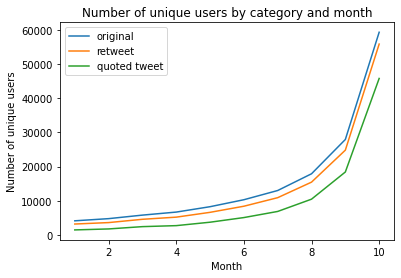

In [13]:
# plot the pivot table
pivot_table.plot()

plt.xlabel("Month")
plt.ylabel("Number of unique users")
plt.title("Number of unique users by category and month")
plt.legend(["original", "retweet", "quoted tweet", "original & retweet", "original & quoted", "quoted & retweet", "original, quoted & retweet"])

plt.show()